<a href="https://colab.research.google.com/github/Ment1984/zarouali-ment-khoualha/blob/main/data%20on%20the%20Falcon%209%20first-stage%20landings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print(f"Error: {response.status_code}")


In [2]:
df = pd.json_normalize(data)


df = df[['flight_number', 'name', 'date_utc', 'rocket', 'success', 'cores', 'links.webcast']]


df['landing_success'] = df['cores'].apply(lambda x: x[0]['landing_success'] if x else None)

df['date_utc'] = pd.to_datetime(df['date_utc'])

df.head()


,flight_number,name,date_utc,rocket,success,cores,links.webcast,landing_success
0,1,FalconSat,2006-03-24 22:30:00+00:00,5e9d0d95eda69955f709d1eb,False,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",https://www.youtube.com/watch?v=0a_00nJ_Y88,None
1,2,DemoSat,2007-03-21 01:10:00+00:00,5e9d0d95eda69955f709d1eb,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,None
2,3,Trailblazer,2008-08-03 03:34:00+00:00,5e9d0d95eda69955f709d1eb,False,"[{'core': '5e9e289ef3591814873b2625', 'flight'...",https://www.youtube.com/watch?v=v0w9p3U8860,None
3,4,RatSat,2008-09-28 23:15:00+00:00,5e9d0d95eda69955f709d1eb,True,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",https://www.youtube.com/watch?v=dLQ2tZEH6G0,None
4,5,RazakSat,2009-07-13 03:35:00+00:00,5e9d0d95eda69955f709d1eb,True,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",https://www.youtube.com/watch?v=yTaIDooc8Og,None


In [3]:
from bs4 import BeautifulSoup
import requests

wiki_url = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches"
response = requests.get(wiki_url)

soup = BeautifulSoup(response.text, 'html.parser')


tables = soup.find_all('table', {'class': 'wikitable'})


In [4]:
df.fillna("Unknown", inplace=True)


In [5]:
successful_landings = df[df['landing_success'] == True]


In [6]:
df.to_csv("spacex_falcon9_data.csv", index=False)


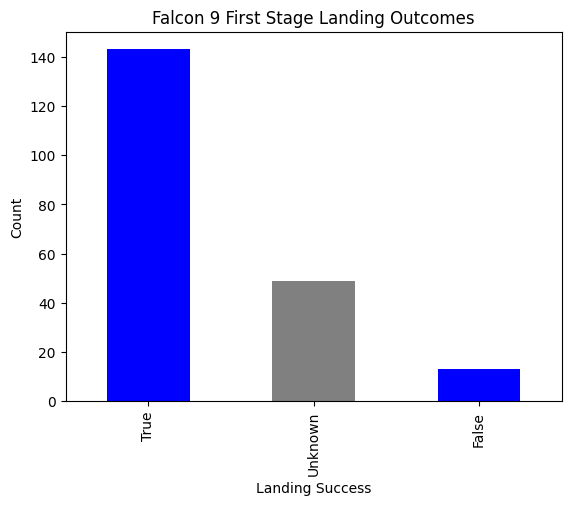

In [8]:
import matplotlib.pyplot as plt


colors = {'True': 'green', 'False': 'red', 'Unknown': 'gray'}
df['landing_success'].value_counts().plot(kind='bar', color=[colors.get(x, 'blue') for x in df['landing_success'].value_counts().index])

plt.title("Falcon 9 First Stage Landing Outcomes")
plt.xlabel("Landing Success")
plt.ylabel("Count")
plt.show()


In [9]:
df['landing_success'] = df['landing_success'].fillna("Unknown")


In [10]:
plt.savefig("falcon9_landings.png", dpi=300)  # High-resolution


<Figure size 640x480 with 0 Axes>

In [11]:
plt.savefig("falcon9_landings.png", dpi=300)  # High-resolution


<Figure size 640x480 with 0 Axes>

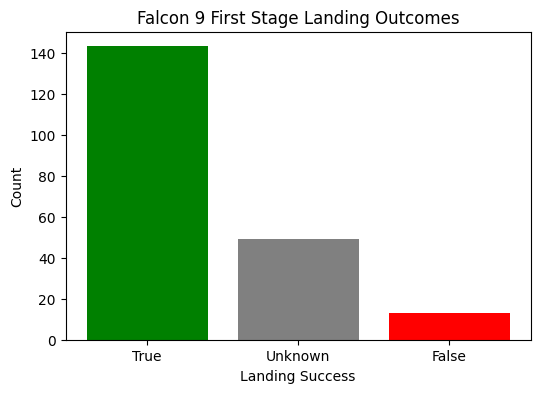

In [12]:
import matplotlib.pyplot as plt

# Define colors explicitly
colors = {'True': 'green', 'False': 'red', 'Unknown': 'gray'}

# Ensure landing_success has correct categories
df['landing_success'] = df['landing_success'].fillna("Unknown").astype(str)

# Plot with colors matching categories
landing_counts = df['landing_success'].value_counts()
plt.figure(figsize=(6, 4))  # Set figure size explicitly

# Assign colors based on landing_success values
plt.bar(landing_counts.index, landing_counts.values, color=[colors.get(x, 'blue') for x in landing_counts.index])

plt.title("Falcon 9 First Stage Landing Outcomes")
plt.xlabel("Landing Success")
plt.ylabel("Count")

plt.show()  # Ensure the plot renders
